<a href="https://colab.research.google.com/github/rajatdeveloper/MIDASS-IIITD-Summer-Internship-Task/blob/master/CV_Problem/computer_vision_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# CONNECTING THE NOTEBOOK TO THE GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# IMPORT GDRIVE
from google.colab import drive

In [0]:
#PREPROCESSING LIBRARIES
%matplotlib inline 
import csv                
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [9]:
#IMPORT IMAGES FROM PICKLE FILE
Train_Images=[]
with open('/content/gdrive/My Drive/Colab Notebooks/IIIT Delhi/Vision_task_dataset_public/train_image.pkl', 'rb') as files:
      Train_Images=pickle.load(files)


# IMPORT LABELS FROM PICKLE FILE    
Train_Labels=[]
with open('/content/gdrive/My Drive/Colab Notebooks/IIIT Delhi/Vision_task_dataset_public/train_label.pkl', 'rb') as files:
    Train_Labels = pickle.load(files)
 
  
#CHECK THE DATA SIZE AND DIMENSIONS
Image = len(Train_Images)   # no images in train set
print(Image)   
print(len(Train_Labels))    # no of labels
print(len(Train_Images[0])) # heightXWidth  


8000
8000
784


In [11]:
#NO OF ROW AND COLUMNS AS 28x28=784
nRow = 28
nCol = 28
TotalBytes = Image*nRow*nCol*1  #since each pixel data is 1 byte
print(TotalBytes)


6272000


In [12]:
# FORM THE NUMPY ARRAY FROM THE LIST OF TRIANING IMAGES
Train_Images = np.array(Train_Images)/255
Image_array= Train_Images.reshape(Image,nRow, nCol)
Image_array= np.array(Image_array)
print(Image_array.shape)

(8000, 28, 28)


In [13]:
# FORM THE NUMPY ARRAY FROM THE LIST OF TRIANING LABELS
Labels_Array = np.array(Train_Labels)
print(Labels_Array)
print(len(Labels_Array))

[0 0 0 ... 6 6 6]
8000


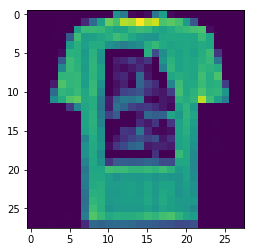

In [14]:
#VISUALIZATION OF THE DATASET

A = Image_array[1000]
plt.imshow(A)

In [16]:
#TEST SET IMPORT
TestSet=[]
with open('/content/gdrive/My Drive/Colab Notebooks/IIIT Delhi/Vision_task_dataset_public/test_image.pkl', 'rb') as files:
      TestSet=pickle.load(files)
print(len(TestSet))   # no images in test set    
print(len(TestSet[0]))

#CONVERTING THE LIST TO NUMPY ARRAY AND RESIZING
TestSet = np.array(TestSet)/255
TestImages = TestSet.reshape(2000, nRow, nCol)
TestImages = np.array(TestImages)

2000
784


#Machine Learning Model

In [0]:
#TRAIN AND VALIDATION SPLIT

from sklearn.model_selection import train_test_split
XTrain, XValid, YTrain, YValid = train_test_split(Train_Images,Labels_Array, test_size=0.20, random_state=4)


In [19]:
# RANDOM FOREST CLASSIFICATION
from sklearn.ensemble import RandomForestClassifier
Model = RandomForestClassifier(n_estimators = 10, random_state = 0)
Model.fit(XTrain, YTrain) 

# MAKING PREDICTIONS IN VALIDATION SET
from sklearn import metrics
YPred = Model.predict(XValid) 
print(metrics.accuracy_score(YValid, YPred))


0.8025


#  Building the training model  # CNN

In [20]:
#IMPORT KERAS LIBRARIES FOR TRAINING
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten

Using TensorFlow backend.


In [0]:
#BATCH SIZE AND EPOCHS
BatchSize = 200
Epochs = 20
NumClasses = 4

In [22]:
#RESIZE THE LABEL SET
Labels_Array = Labels_Array.reshape(len(Train_Labels),1)


#CONVERT LABEL ARRAY TO BINARY MATRIX OF CLASSES
from sklearn.preprocessing import MultiLabelBinarizer
Binerizer = MultiLabelBinarizer()
Labels_Array=Binerizer.fit_transform(Labels_Array)
print(Labels_Array)

[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 ...
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]]


In [23]:
#VERIFY THE DIMESIONS
XTrain = Image_array
YTrain = Labels_Array
print(XTrain.shape)
print(YTrain.shape)

(8000, 28, 28)
(8000, 4)


In [0]:
XTest = TestImages

In [0]:
XTrain = XTrain.reshape(8000,28,28,1)


In [0]:
XTest = XTest.reshape(2000,28,28,1)

In [27]:
#VERIFY THE IMAGES DIMENSIONS
print('X Train shape:', XTrain.shape)
print(XTrain.shape[0], 'Train Samples')
print('Y Train: ', YTrain.shape)


X Train shape: (8000, 28, 28, 1)
8000 Train Samples
Y Train:  (8000, 4)


In [28]:
#VERIFY THE TEST DIMENSIONS
print('X Test Shape:', XTest.shape)
print(XTest.shape[0], 'Test Samples')

X Test Shape: (2000, 28, 28, 1)
2000 Test Samples


#CONVOLUTIONAL NEURAL NETWORK 
   TRAINING THE DATASET

```

```



In [0]:
Model = Sequential()


In [30]:
#CONVOLUTION MODEL BUILT

# STEP 1 CONVOLUTION
Model.add(Conv2D(32, (3, 3), input_shape = (28, 28, 1), activation = 'relu'))

# STEP 2 POOLING
Model.add(MaxPooling2D(pool_size = (2, 2)))

# SECOND LAYER ADDED
Model.add(Conv2D(64, (3, 3), activation = 'relu'))
Model.add(MaxPooling2D(pool_size = (2, 2)))

# NEXT LAYER ADDED
Model.add(Conv2D(64, (3, 3), activation = 'relu'))
Model.add(MaxPooling2D(pool_size = (2, 2)))

# STEP 3 FLATTENING
Model.add(Flatten())

# SSTEP 4 FULL CONNECTION
Model.add(Dense(units = 64, activation = 'relu'))
Model.add(Dense(units = 4, activation = 'softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
# MODEL COMPILATION
Model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [32]:
# FIT AND TRAIN
Model.fit(x = XTrain, y = YTrain, 
          validation_split=0.1, 
          batch_size = BatchSize, 
          verbose=2, 
          epochs=Epochs,
          shuffle = True )



Instructions for updating:
Use tf.cast instead.
Train on 7200 samples, validate on 800 samples
Epoch 1/20
 - 8s - loss: 1.0801 - acc: 0.5500 - val_loss: 1.6130 - val_acc: 0.0037
Epoch 2/20
 - 8s - loss: 0.7375 - acc: 0.7146 - val_loss: 1.2272 - val_acc: 0.0550
Epoch 3/20
 - 8s - loss: 0.6562 - acc: 0.7412 - val_loss: 1.7300 - val_acc: 0.0112
Epoch 4/20
 - 8s - loss: 0.6476 - acc: 0.7426 - val_loss: 1.3403 - val_acc: 0.1113
Epoch 5/20
 - 8s - loss: 0.6073 - acc: 0.7582 - val_loss: 1.3894 - val_acc: 0.0713
Epoch 6/20
 - 8s - loss: 0.5706 - acc: 0.7714 - val_loss: 1.3623 - val_acc: 0.2762
Epoch 7/20
 - 8s - loss: 0.5433 - acc: 0.7925 - val_loss: 1.1462 - val_acc: 0.4450
Epoch 8/20
 - 8s - loss: 0.5095 - acc: 0.8035 - val_loss: 0.9757 - val_acc: 0.5350
Epoch 9/20
 - 8s - loss: 0.4808 - acc: 0.8186 - val_loss: 1.4314 - val_acc: 0.3375
Epoch 10/20
 - 8s - loss: 0.4619 - acc: 0.8240 - val_loss: 0.6310 - val_acc: 0.6813
Epoch 11/20
 - 8s - loss: 0.4467 - acc: 0.8299 - val_loss: 0.9919 - val_ac

In [33]:
#MAKING PREDICTIONS 
Predictions = Model.predict(XTest)
print(Predictions)

[[9.6395087e-01 5.4563349e-04 8.4486685e-04 3.4658678e-02]
 [6.2244171e-01 1.6079558e-02 1.6844763e-01 1.9303107e-01]
 [9.6858144e-01 2.9156455e-03 2.0999846e-03 2.6402885e-02]
 ...
 [2.6483357e-01 4.1245531e-02 2.7689135e-01 4.1702956e-01]
 [1.8496381e-03 1.5382666e-02 2.9503525e-04 9.8247266e-01]
 [1.1310236e-03 8.8792384e-01 9.4036628e-03 1.0154145e-01]]


In [34]:
# CONVERTING THE PREDICTION MATRIX OF DECIMALS TO BINARY MATRIX
for a in Predictions:
  max_ = 0
  for i in range(1,4):
    if(a[max_]<a[i]):
      max_ = i
  for i in range(0,4):
    if(max_ == i):
      a[i] = int(1)
    else:
      a[i] = int(0)
    
print(Predictions)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [0]:
# BINRIZING INVERSE TO CLASSES
Predictions = Binerizer.inverse_transform(Predictions)

In [0]:
#LIST OF STRING FROM INTEGER LIST
predictions = [str(x[0]) for x in Predictions]

In [37]:
#CHECK PREDICTIONS
print(Predictions)

[(0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (2,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (6,), (0,), (0,), (6,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (3,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (0,), (3,), (0,), (0,), (0,), (3,), (3,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (3,), (0,), (2,), (0,), (0,), (0,), (0,), (0,), (3,), (2,), (6,), (0,), (0,), (0,), (2,), (0,), (0,), (0,), (3,), (6,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (6,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (3,), (0,), (0,), (0,), (2,), (6,), (0,), (0,), (0,), (0,), (0,), (0,), (0,), (0,

In [0]:
# UPDATING THE PREDICTIONS TO CSV FILE 
with open('/content/gdrive/My Drive/Rajat_Singhal.csv',"w") as file:
    file.write("image_index"+","+"class")
    file.write("\n")
    for i in range(len(Predictions)):
        file.write(str(i)+","+str(Predictions[i]))
        file.write("\n")

Thank you to IIIT Delhi for this golden opportunity
Calculated accuracy over train set is 86.64%
